# pandas

The `pandas` library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the `DataFrame`, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel or Databases are thus available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.

Now let's import `pandas`. People usually import it as `pd`:

In [1]:
import pandas as pd

If `pandas` is not installed in your system, you can install it with the following command

In [ ]:
!pip install matplotlib

# `Series` objects
The `pandas` library contains these useful data structures:
* `Series` objects, that we will discuss now. A `Series` object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* `DataFrame` objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).
* `Panel` objects. You can see a `Panel` as a dictionary of `DataFrame`s. These are less used, so we will not discuss them here.

## Creating a `Series`
Let's start by creating our first `Series` object!

In [2]:
s = pd.Series([2,-1,3,5])
s

0    2
1   -1
2    3
3    5
dtype: int64

## Similar to a 1D `ndarray`
`Series` objects behave much like one-dimensional NumPy `ndarray`s, and you can often pass them as parameters to NumPy functions:

In [3]:
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

Arithmetic operations on `Series` are also possible, and they apply *elementwise*, just like for `ndarray`s:

In [5]:
s + [1000,2000,3000,4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

Similar to NumPy, if you add a single number to a `Series`, that number is added to all items in the `Series`. This is called * broadcasting*:

In [6]:
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

The same is true for all binary operations such as `*` or `/`, and even conditional operations:

In [4]:
s < 0

0    False
1     True
2    False
3    False
dtype: bool

## Index labels
Each item in a `Series` object has a unique identifier called the *index label*. By default, it is simply the rank of the item in the `Series` (starting at `0`) but you can also set the index labels manually:

In [5]:
s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

You can then use the `Series` just like a `dict`:

In [9]:
s2["bob"]

83

You can still access the items by integer location, like in a regular array:

In [10]:
s2[1]

83

To make it clear when you are accessing by label or by integer location, it is recommended to always use the `loc` attribute when accessing by label, and the `iloc` attribute when accessing by integer location:

In [6]:
s2.loc["bob"]

83

In [7]:
s2.iloc[1]

83

Slicing a `Series` also slices the index labels:

In [8]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

## Init from `dict`
You can create a `Series` object from a `dict`. The keys will be used as index labels:

In [11]:
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

You can control which elements you want to include in the `Series` and in what order by explicitly specifying the desired `index`:

In [12]:
s4 = pd.Series(weights, index = ["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

## Automatic alignment
When an operation involves multiple `Series` objects, `pandas` automatically aligns items by matching index labels.

In [13]:
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

The resulting `Series` contains the union of index labels from `s2` and `s3`. Since `"colin"` is missing from `s2` and `"charles"` is missing from `s3`, these items have a `NaN` result value. (ie. Not-a-Number means *missing*).

## Init with a scalar
You can also initialize a `Series` object using a scalar and a list of index labels: all items will be set to the scalar.

In [14]:
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

## `Series` name
A `Series` can have a `name`:

In [15]:
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plotting a `Series`
Pandas makes it easy to plot `Series` data using matplotlib (for more details on matplotlib, check out the [matplotlib tutorial](tools_matplotlib.ipynb)). Just import matplotlib and call the `plot()` method:

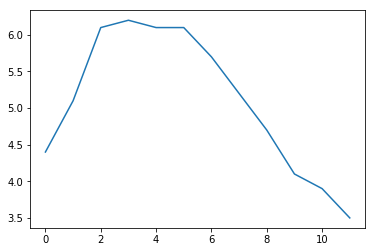

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

# `DataFrame` objects
A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see `DataFrame`s as dictionaries of `Series`.

## Creating a `DataFrame`
You can create a DataFrame by passing a dictionary of `Series` objects:

In [17]:
people_dict = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}
people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


A few things to note:
* the `Series` were automatically aligned based on their index,
* missing values are represented as `NaN`,
* `Series` names are ignored (the name `"year"` was dropped),
* `DataFrame`s are displayed nicely in Jupyter notebooks.

You can access columns pretty much as you would expect. They are returned as `Series` objects:

In [18]:
people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

You can also get multiple columns at once:

In [19]:
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


If you pass a list of columns and/or index row labels to the `DataFrame` constructor, it will guarantee that these columns and/or rows will exist, in that order, and no other column/row will exist. For example:

In [21]:
d2 = pd.DataFrame(
        people_dict,
        columns=["birthyear", "weight", "height"],
        index=["bob", "alice", "eugene"]
     )
d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


Another convenient way to create a `DataFrame` is to pass all the values to the constructor as an `ndarray`, or a list of lists, and specify the column names and row index labels separately:

In [22]:
values = [
            [1985, np.nan, "Biking",   68],
            [1984, 3,      "Dancing",  83],
            [1992, 0,      np.nan,    112]
         ]
d3 = pd.DataFrame(
        values,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


To specify missing values, you can either use `np.nan` or NumPy's masked arrays:

In [23]:
masked_array = np.ma.asarray(values, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
        masked_array,
        columns=["birthyear", "children", "hobby", "weight"],
        index=["alice", "bob", "charles"]
     )
d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


Instead of an `ndarray`, you can also pass a `DataFrame` object:

In [24]:
d4 = pd.DataFrame(
         d3,
         columns=["hobby", "children"],
         index=["alice", "bob"]
     )
d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


It is also possible to create a `DataFrame` with a dictionary (or list) of dictionaries (or list):

In [25]:
people = pd.DataFrame({
    "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
    "hobby": {"alice":"Biking", "bob": "Dancing"},
    "weight": {"alice":68, "bob": 83, "charles": 112},
    "children": {"bob": 3, "charles": 0}
})
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


## Accessing rows

The `loc` attribute lets you access rows instead of columns. The result is a `Series` object in which the `DataFrame`'s column names are mapped to row index labels:

In [26]:
people.loc["charles"]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

You can also access rows by integer location using the `iloc` attribute:

In [27]:
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children        0
Name: charles, dtype: object

You can also get a slice of rows, and this returns a `DataFrame` object:

In [28]:
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


Finally, you can pass a boolean array to get the matching rows:

In [29]:
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


This is most useful when combined with boolean expressions:

In [30]:
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


## Adding and removing columns
You can generally treat `DataFrame` objects like dictionaries of `Series`, so the following work fine:

In [31]:
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [32]:
people["age"] = 2018 - people["birthyear"]  # adds a new column "age"
people["over 30"] = people["age"] > 30      # adds another column "over 30"
birthyears = people.pop("birthyear")
del people["children"]

people

,hobby,weight,age,over 30
alice,Biking,68,33,True
bob,Dancing,83,34,True
charles,NaN,112,26,False


In [33]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

When you add a new colum, it must have the same number of rows. Missing rows are filled with NaN, and extra rows are ignored:

In [34]:
people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice is missing, eugene is ignored
people

,hobby,weight,age,over 30,pets
alice,Biking,68,33,True,NaN
bob,Dancing,83,34,True,0.0
charles,NaN,112,26,False,5.0


When adding a new column, it is added at the end (on the right) by default. You can also insert a column anywhere else using the `insert()` method:

In [35]:
people.insert(1, "height", [172, 181, 185])
people

,hobby,height,weight,age,over 30,pets
alice,Biking,172,68,33,True,NaN
bob,Dancing,181,83,34,True,0.0
charles,NaN,185,112,26,False,5.0


## Assigning new columns
You can also create new columns by calling the `assign()` method. Note that this returns a new `DataFrame` object, the original is not modified:

In [36]:
people.assign(
    body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
    has_pets = people["pets"] > 0
)

,hobby,height,weight,age,over 30,pets,body_mass_index,has_pets
alice,Biking,172,68,33,True,NaN,22.985398,False
bob,Dancing,181,83,34,True,0.0,25.335002,False
charles,NaN,185,112,26,False,5.0,32.724617,True


## Querying a `DataFrame`
The `query()` method lets you filter a `DataFrame` based on a query expression:

In [38]:
people.query("age > 30 and pets == 0")

,hobby,height,weight,age,over 30,pets
bob,Dancing,181,83,34,True,0.0


## Sorting a `DataFrame`
You can sort a `DataFrame` by calling its `sort_index` method. By default it sorts the rows by their index label, in ascending order, but let's reverse the order:

In [39]:
people.sort_index(ascending=False)

,hobby,height,weight,age,over 30,pets
charles,NaN,185,112,26,False,5.0
bob,Dancing,181,83,34,True,0.0
alice,Biking,172,68,33,True,NaN


Note that `sort_index` returned a sorted *copy* of the `DataFrame`. To modify `people` directly, we can set the `inplace` argument to `True`. Also, we can sort the columns instead of the rows by setting `axis=1`:

In [40]:
people.sort_index(axis=1, inplace=True)
people

,age,height,hobby,over 30,pets,weight
alice,33,172,Biking,True,NaN,68
bob,34,181,Dancing,True,0.0,83
charles,26,185,NaN,False,5.0,112


To sort the `DataFrame` by the values instead of the labels, we can use `sort_values` and specify the column to sort by:

In [41]:
people.sort_values(by="age", inplace=True)
people

,age,height,hobby,over 30,pets,weight
charles,26,185,NaN,False,5.0,112
alice,33,172,Biking,True,NaN,68
bob,34,181,Dancing,True,0.0,83


## Operations on `DataFrame`s
Although `DataFrame`s do not try to mimick NumPy arrays, there are a few similarities. Let's create a `DataFrame` to demonstrate this:

In [42]:
grades_array = np.array([[8,8,9],[10,9,9],[4, 8, 2], [9, 10, 10]])
grades = pd.DataFrame(grades_array, columns=["sep", "oct", "nov"], index=["alice","bob","charles","darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


You can apply NumPy mathematical functions on a `DataFrame`: the function is applied to all values:

In [43]:
np.sqrt(grades)

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


Similarly, adding a single value to a `DataFrame` will add that value to all elements in the `DataFrame`. This is called *broadcasting*:

In [44]:
grades + 1

,sep,oct,nov
alice,9,9,10
bob,11,10,10
charles,5,9,3
darwin,10,11,11


Of course, the same is true for all other binary operations, including arithmetic (`*`,`/`,`**`...) and conditional (`>`, `==`...) operations:

In [45]:
grades >= 5

,sep,oct,nov
alice,True,True,True
bob,True,True,True
charles,False,True,False
darwin,True,True,True


Aggregation operations, such as computing the `max`, the `sum` or the `mean` of a `DataFrame`, apply to each column, and you get back a `Series` object:

In [46]:
grades.mean()

sep    7.75
oct    8.75
nov    7.50
dtype: float64

The `all` method is also an aggregation operation: it checks whether all values are `True` or not. Let's see during which months all students got a grade greater than `5`:

In [47]:
(grades > 5).all()

sep    False
oct     True
nov    False
dtype: bool

Most of these functions take an optional `axis` parameter which lets you specify along which axis of the `DataFrame` you want the operation executed. The default is `axis=0`, meaning that the operation is executed vertically (on each column). You can set `axis=1` to execute the operation horizontally (on each row). For example, let's find out which students had all grades greater than `5`:

In [48]:
(grades > 5).all(axis = 1)

alice       True
bob         True
charles    False
darwin      True
dtype: bool

The `any` method returns `True` if any value is True. Let's see who got at least one grade 10:

In [49]:
(grades == 10).any(axis = 1)

alice      False
bob         True
charles    False
darwin      True
dtype: bool

Looks like the addition worked in some cases but way too many elements are now empty. That's because when aligning the `DataFrame`s, some columns and rows were only present on one side, and thus they were considered missing on the other side (`NaN`). Then adding `NaN` to a number results in `NaN`, hence the result.

## Overview functions
When dealing with large `DataFrames`, it is useful to get a quick overview of its content. Pandas offers a few functions for this. First, let's create a large `DataFrame` with a mix of numeric values, missing values and text values. Notice how Jupyter displays only the corners of the `DataFrame`:

In [52]:
much_data = np.fromfunction(lambda x,y: (x+y*y)%17*11, (10000, 26))
large_df = pd.DataFrame(much_data, columns=list("ABCDEFGHIJKLMNOPQRSTUVWXYZ"))
large_df[large_df % 16 == 0] = np.nan
large_df.insert(3,"some_text", "Blabla")
large_df

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN
5,55.0,66.0,99.0,Blabla,154.0,44.0,143.0,77.0,33.0,11.0,...,66.0,55.0,66.0,99.0,154.0,44.0,143.0,77.0,33.0,11.0
6,66.0,77.0,110.0,Blabla,165.0,55.0,154.0,88.0,44.0,22.0,...,77.0,66.0,77.0,110.0,165.0,55.0,154.0,88.0,44.0,22.0
7,77.0,88.0,121.0,Blabla,NaN,66.0,165.0,99.0,55.0,33.0,...,88.0,77.0,88.0,121.0,NaN,66.0,165.0,99.0,55.0,33.0
8,88.0,99.0,132.0,Blabla,NaN,77.0,NaN,110.0,66.0,44.0,...,99.0,88.0,99.0,132.0,NaN,77.0,NaN,110.0,66.0,44.0
9,99.0,110.0,143.0,Blabla,11.0,88.0,NaN,121.0,77.0,55.0,...,110.0,99.0,110.0,143.0,11.0,88.0,NaN,121.0,77.0,55.0


The `head()` method returns the top 5 rows:

In [53]:
large_df.head()

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
0,NaN,11.0,44.0,Blabla,99.0,NaN,88.0,22.0,165.0,143.0,...,11.0,NaN,11.0,44.0,99.0,NaN,88.0,22.0,165.0,143.0
1,11.0,22.0,55.0,Blabla,110.0,NaN,99.0,33.0,NaN,154.0,...,22.0,11.0,22.0,55.0,110.0,NaN,99.0,33.0,NaN,154.0
2,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
3,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN
4,44.0,55.0,88.0,Blabla,143.0,33.0,132.0,66.0,22.0,NaN,...,55.0,44.0,55.0,88.0,143.0,33.0,132.0,66.0,22.0,NaN


Of course there's also a `tail()` function to view the bottom 5 rows. You can pass the number of rows you want:

In [54]:
large_df.tail(n=2)

,A,B,C,some_text,D,E,F,G,H,I,...,Q,R,S,T,U,V,W,X,Y,Z
9998,22.0,33.0,66.0,Blabla,121.0,11.0,110.0,44.0,NaN,165.0,...,33.0,22.0,33.0,66.0,121.0,11.0,110.0,44.0,NaN,165.0
9999,33.0,44.0,77.0,Blabla,132.0,22.0,121.0,55.0,11.0,NaN,...,44.0,33.0,44.0,77.0,132.0,22.0,121.0,55.0,11.0,NaN


The `info()` method prints out a summary of each columns contents:

In [55]:
large_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
A            8823 non-null float64
B            8824 non-null float64
C            8824 non-null float64
some_text    10000 non-null object
D            8824 non-null float64
E            8822 non-null float64
F            8824 non-null float64
G            8824 non-null float64
H            8822 non-null float64
I            8823 non-null float64
J            8823 non-null float64
K            8822 non-null float64
L            8824 non-null float64
M            8824 non-null float64
N            8822 non-null float64
O            8824 non-null float64
P            8824 non-null float64
Q            8824 non-null float64
R            8823 non-null float64
S            8824 non-null float64
T            8824 non-null float64
U            8824 non-null float64
V            8822 non-null float64
W            8824 non-null float64
X            8824 non-null float64
Y            8822

Finally, the `describe()` method gives a nice overview of the main aggregated values over each column:
* `count`: number of non-null (not NaN) values
* `mean`: mean of non-null values
* `std`: [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) of non-null values
* `min`: minimum of non-null values
* `25%`, `50%`, `75%`: 25th, 50th and 75th [percentile](https://en.wikipedia.org/wiki/Percentile) of non-null values
* `max`: maximum of non-null values

In [56]:
large_df.describe()

,A,B,C,D,E,F,G,H,I,J,...,Q,R,S,T,U,V,W,X,Y,Z
count,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000,8823.000000,...,8824.000000,8823.000000,8824.000000,8824.000000,8824.000000,8822.000000,8824.000000,8824.000000,8822.000000,8823.000000
mean,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441,88.022441,...,87.972575,87.977559,87.972575,87.987534,88.012466,87.983791,88.007480,87.977561,88.000000,88.022441
std,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911,47.535911,...,47.535523,47.535911,47.535523,47.521679,47.521679,47.535001,47.519371,47.529755,47.536879,47.535911
min,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
25%,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
50%,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,...,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
75%,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
max,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000


# Saving & loading
Pandas can save `DataFrame`s to various backends, including file formats such as CSV, Excel, JSON, HTML and HDF5, or to a SQL database. Let's create a `DataFrame` to demonstrate this:

In [126]:
my_df = pd.DataFrame(
    [["Biking", 68.5, 1985, np.nan], ["Dancing", 83.1, 1984, 3]], 
    columns=["hobby","weight","birthyear","children"],
    index=["alice", "bob"]
)
my_df

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


## Saving
Let's save it to CSV, HTML and JSON:

In [127]:
my_df.to_csv("my_df.csv")
my_df.to_html("my_df.html")
my_df.to_json("my_df.json")

Done! Let's take a peek at what was saved:

In [128]:
for filename in ("my_df.csv", "my_df.html", "my_df.json"):
    print("#", filename)
    with open(filename, "rt") as f:
        print(f.read())
        print()


# my_df.csv
,hobby,weight,birthyear,children
alice,Biking,68.5,1985,
bob,Dancing,83.1,1984,3.0


# my_df.html
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hobby</th>
      <th>weight</th>
      <th>birthyear</th>
      <th>children</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>alice</th>
      <td>Biking</td>
      <td>68.5</td>
      <td>1985</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>bob</th>
      <td>Dancing</td>
      <td>83.1</td>
      <td>1984</td>
      <td>3.0</td>
    </tr>
  </tbody>
</table>

# my_df.json
{"hobby":{"alice":"Biking","bob":"Dancing"},"weight":{"alice":68.5,"bob":83.1},"birthyear":{"alice":1985,"bob":1984},"children":{"alice":null,"bob":3.0}}



Note that the index is saved as the first column (with no name) in a CSV file, as `<th>` tags in HTML and as keys in JSON.

## Loading
Now let's load our CSV file back into a `DataFrame`:

In [129]:
my_df_loaded = pd.read_csv("my_df.csv", index_col=0)
my_df_loaded

,hobby,weight,birthyear,children
alice,Biking,68.5,1985,NaN
bob,Dancing,83.1,1984,3.0


# Combining `DataFrame`s

## SQL-like joins
One powerful feature of pandas is it's ability to perform SQL-like joins on `DataFrame`s. Various types of joins are supported: inner joins, left/right outer joins and full joins. To illustrate this, let's start by creating a couple simple `DataFrame`s:

In [57]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [58]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


Now let's join these `DataFrame`s using the `merge()` function:

In [59]:
pd.merge(left=city_loc, right=city_pop, on="city")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida


Note that both `DataFrame`s have a column named `state`, so in the result they got renamed to `state_x` and `state_y`.

Also, note that Cleveland, Salt Lake City and Houston were dropped because they don't exist in *both* `DataFrame`s. This is the equivalent of a SQL `INNER JOIN`. If you want a `FULL OUTER JOIN`, where no city gets dropped and `NaN` values are added, you must specify `how="outer"`:

In [60]:
all_cities = pd.merge(left=city_loc, right=city_pop, on="city", how="outer")
all_cities

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976.0,California
1,NY,New York,40.705649,-74.008344,8363710.0,New-York
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,OH,Cleveland,41.473508,-81.739791,NaN,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,NaN,Houston,NaN,NaN,2242193.0,Texas


Of course `LEFT OUTER JOIN` is also available by setting `how="left"`: only the cities present in the left `DataFrame` end up in the result. Similarly, with `how="right"` only cities in the right `DataFrame` appear in the result. For example:

In [61]:
pd.merge(left=city_loc, right=city_pop, on="city", how="right")

,state_x,city,lat,lng,population,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,California
1,NY,New York,40.705649,-74.008344,8363710,New-York
2,FL,Miami,25.791100,-80.320733,413201,Florida
3,NaN,Houston,NaN,NaN,2242193,Texas


If the key to join on is actually in one (or both) `DataFrame`'s index, you must use `left_index=True` and/or `right_index=True`. If the key column names differ, you must use `left_on` and `right_on`. For example:

In [62]:
city_pop2 = city_pop.copy()
city_pop2.columns = ["population", "name", "state"]
pd.merge(left=city_loc, right=city_pop2, left_on="city", right_on="name")

,state_x,city,lat,lng,population,name,state_y
0,CA,San Francisco,37.781334,-122.416728,808976,San Francisco,California
1,NY,New York,40.705649,-74.008344,8363710,New York,New-York
2,FL,Miami,25.791100,-80.320733,413201,Miami,Florida


## Concatenation
Rather than joining `DataFrame`s, we may just want to concatenate them. That's what `concat()` is for:

In [63]:
result_concat = pd.concat([city_loc, city_pop],sort=False)
result_concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


Note that this operation aligned the data horizontally (by columns) but not vertically (by rows). In this example, we end up with multiple rows having the same index (eg. 3). Pandas handles this rather gracefully:

In [64]:
result_concat.loc[3]

,state,city,lat,lng,population
3,OH,Cleveland,41.473508,-81.739791,NaN
3,California,San Francisco,NaN,NaN,808976.0


Or you can tell pandas to just ignore the index:

In [65]:
pd.concat([city_loc, city_pop], ignore_index=True,sort=False)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


Notice that when a column does not exist in a `DataFrame`, it acts as if it was filled with `NaN` values. If we set `join="inner"`, then only columns that exist in *both* `DataFrame`s are returned:

In [66]:
pd.concat([city_loc, city_pop], join="inner")

,state,city
0,CA,San Francisco
1,NY,New York
2,FL,Miami
3,OH,Cleveland
4,UT,Salt Lake City
3,California,San Francisco
4,New-York,New York
5,Florida,Miami
6,Texas,Houston


You can concatenate `DataFrame`s horizontally instead of vertically by setting `axis=1`:

In [67]:
pd.concat([city_loc, city_pop], axis=1)

,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas


In this case it really does not make much sense because the indices do not align well (eg. Cleveland and San Francisco end up on the same row, because they shared the index label `3`). So let's reindex the `DataFrame`s by city name before concatenating:

The `append()` method is a useful shorthand for concatenating `DataFrame`s vertically:

In [151]:
city_loc.append(city_pop,sort=False)

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


As always in pandas, the `append()` method does *not* actually modify `city_loc`: it works on a copy and returns the modified copy.